In [6]:
from main import create_TrendDF
from Trend import Trend
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataframe
This loads a dataframe with "journal entries" scraped from a social media fashion site dated between 2009 & 2013. The entries for years 2009-2012 have been used to train a Word2Vec model, from which I developed a "garment vocabulary" but finding all words in a similar space to six "basic" garment words: dress, shirt, pants, skirt, shoes, and bag. I then created a new feature in the data set in which the text of the journal entries are "bigrammified" by prepending the preceding word (usually an adjective) every time a garment word is found in the entry. 

In [2]:
trenddf = create_TrendDF('../data2/bg_df_2009_2013.pkl')

Loading large dataframe from pickle. Please wait.
Creating counter of all words/bigrams


# Find Potential Trends
This allows me to mine the journal entries for potential trends. The model shown here is extremely basic: if the raw frequency count for a given bigram is a certain factor (in this case, 1.5) larger in a certain year than in the preceding year, it is labelled as a potential trend. 

In [3]:
potential_trends_2013 = trenddf.find_big_change(2011, 2012, 1.5)

Loading large dataframe from pickle. Please wait.
Creating counter of all words/bigrams
Loading large dataframe from pickle. Please wait.
Creating counter of all words/bigrams


In [7]:
potential_trends_2013

['peplum_top',
 'boyfriend_jeans',
 'printed_pants',
 'small_pants',
 'denim_vest',
 'skater_dress',
 'colored_pants',
 'wrap_dress',
 'bodycon_dress',
 'floral_pants',
 'colored_jeans',
 'chambray_shirt',
 'mullet_skirt',
 'shoulder_bag',
 'pencil_skirt',
 'chiffon_skirt',
 'leather_skirt',
 'print_pants',
 'envelope_clutch',
 'chiffon_blouse',
 'waist_shorts',
 'print_shirt',
 'party_dress',
 'graphic_tee',
 'sleeveless_dress',
 'peplum_skirt',
 'peplum_dress',
 'skinny_pants',
 'sole_heels',
 'ankle_booties',
 'leather_leggings',
 'floral_shirt',
 'tank_dress',
 'shift_dress',
 'crop_top',
 'circle_skirt',
 'printed_dress',
 'lace_blouse']

# Inspection/Classification
I can now plot each potential trend across all 5 years, to determine what type of cycle the trend is following. (steady growth, fad, consistent popularity/false positive, etc). We can see that even this very simple version of the model has strong signal. I will use the years 2009-2013 to refine a predictive model, which I will then test on the 2014 data and continue to refine, repeating this cycle for years 2015 and 2016 before testing a live model. 

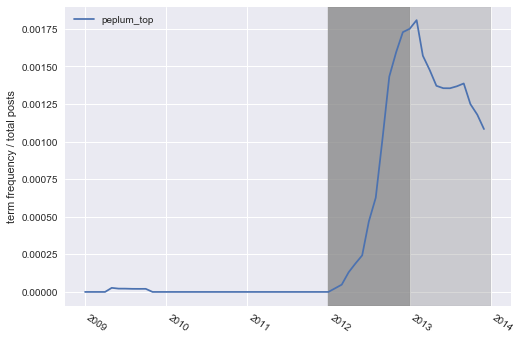

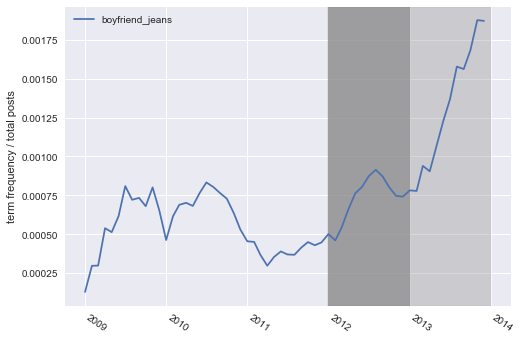

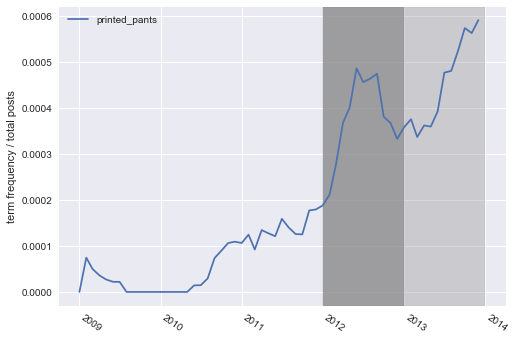

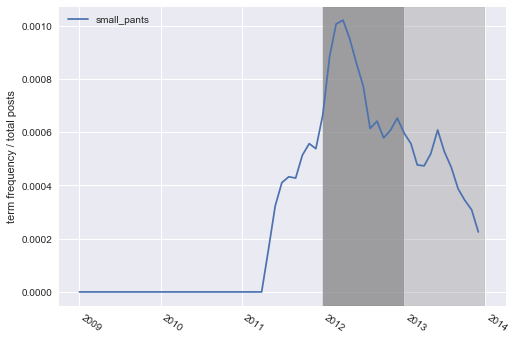

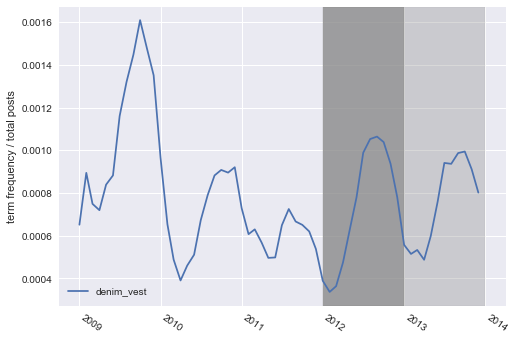

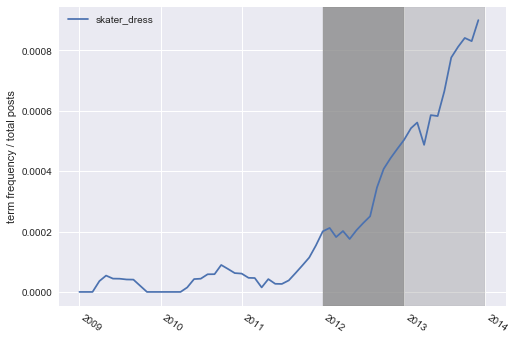

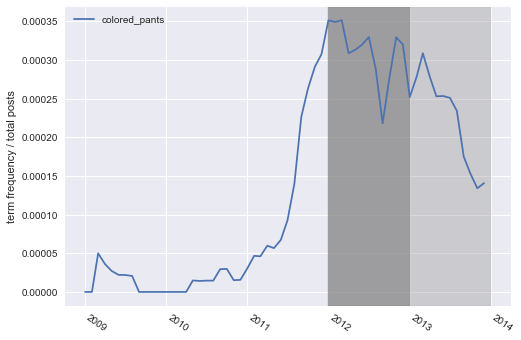

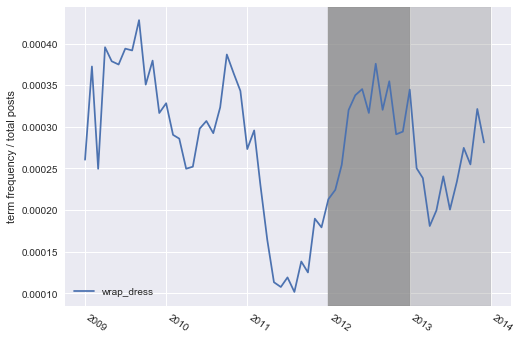

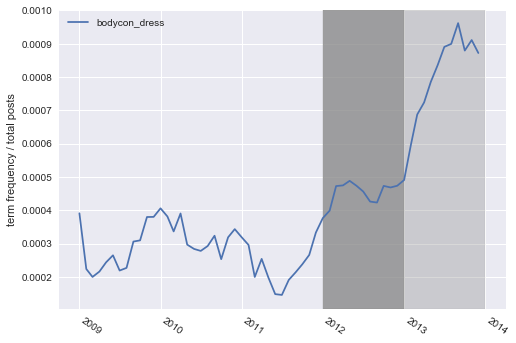

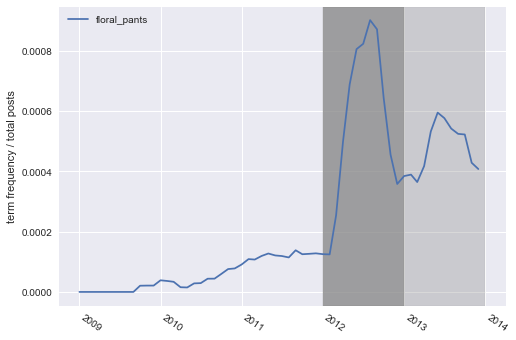

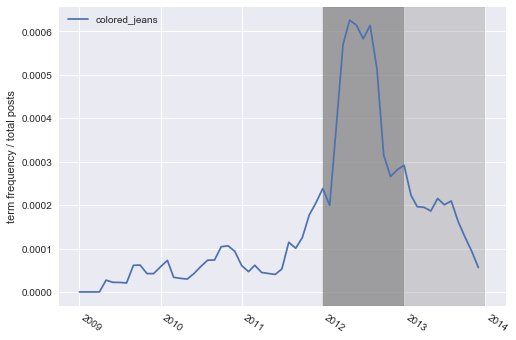

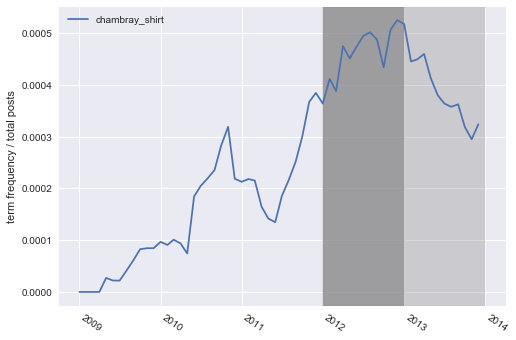

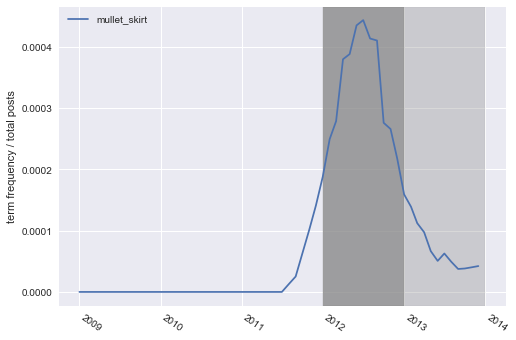

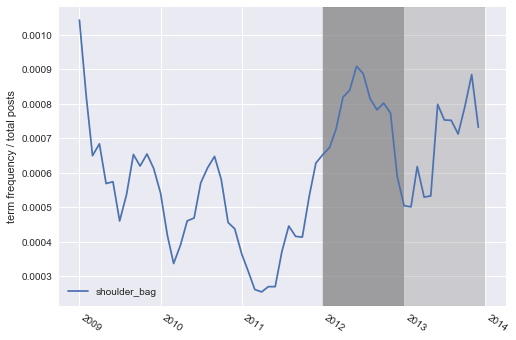

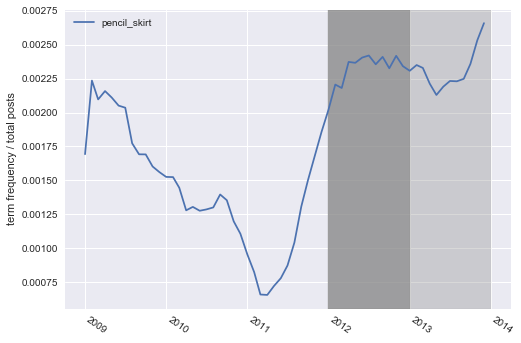

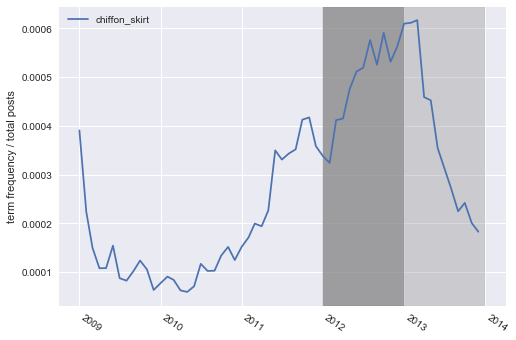

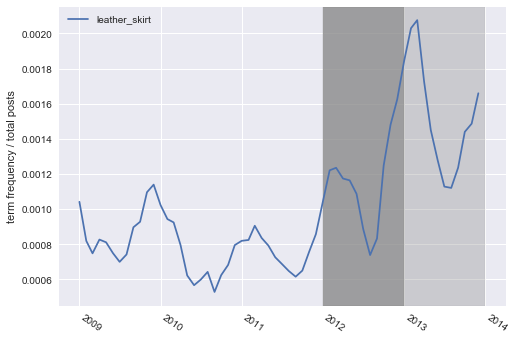

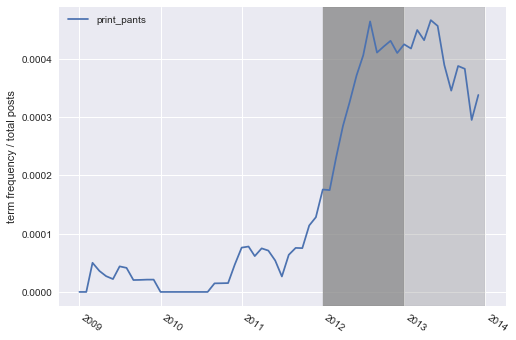

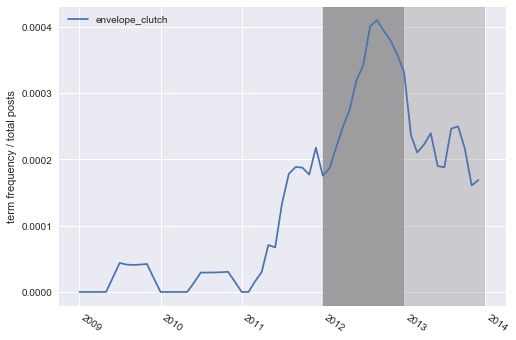

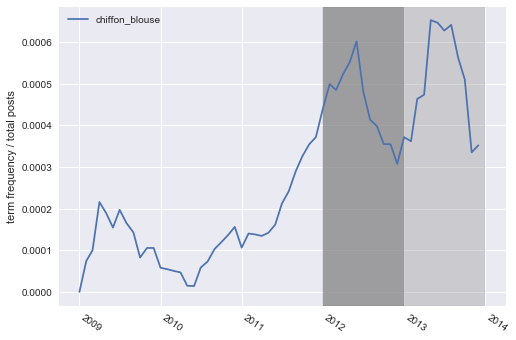

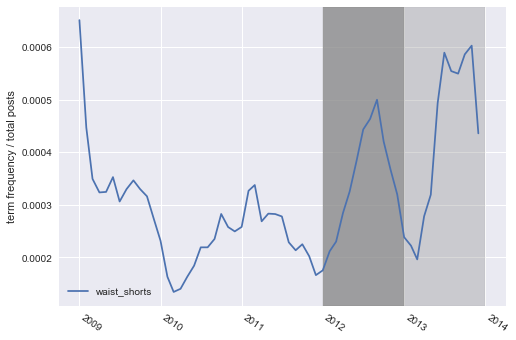

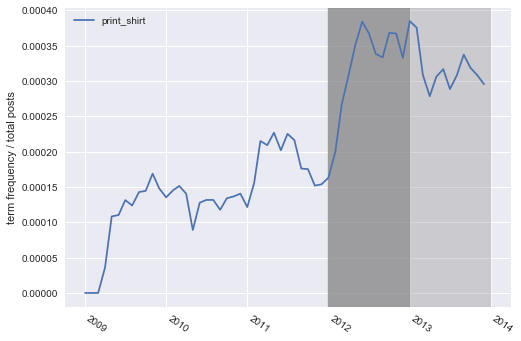

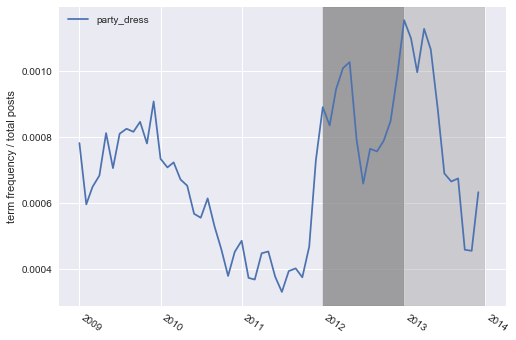

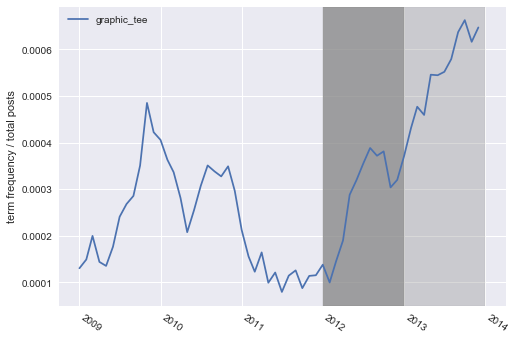

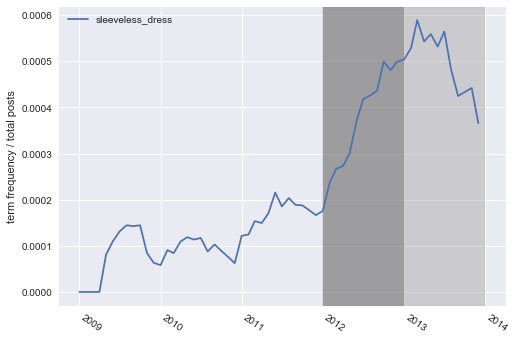

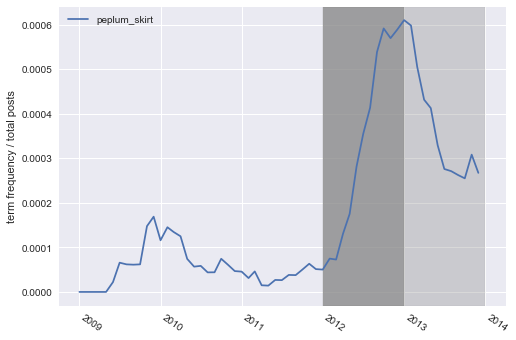

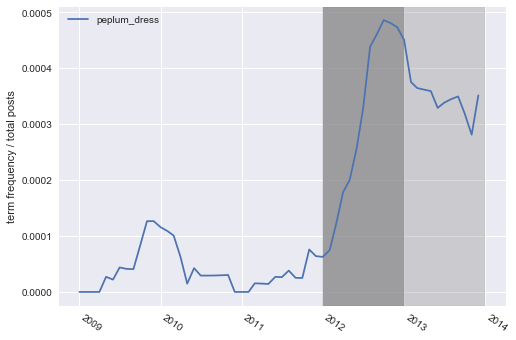

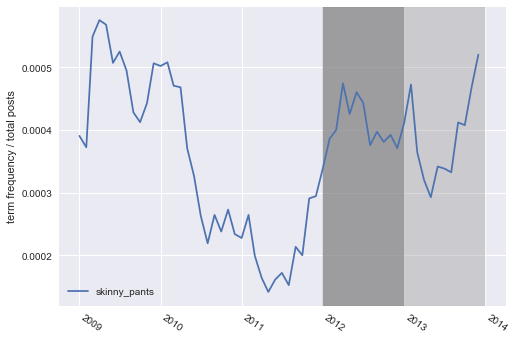

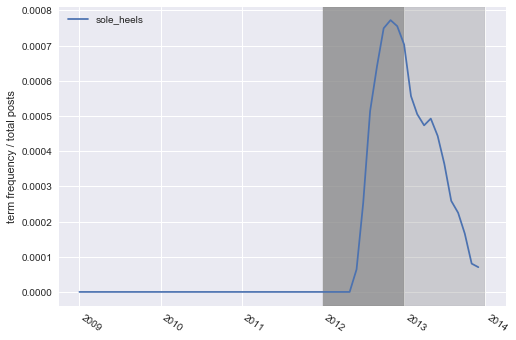

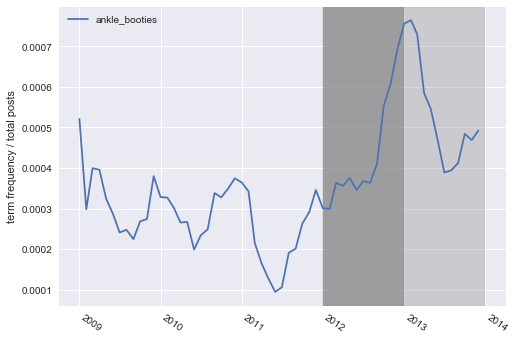

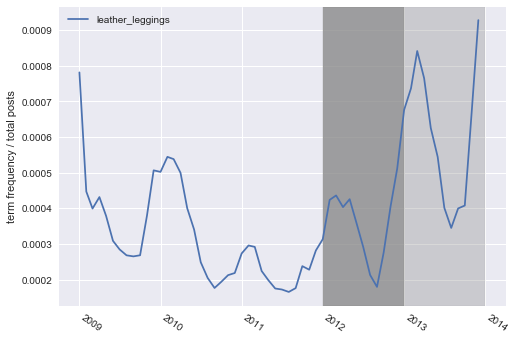

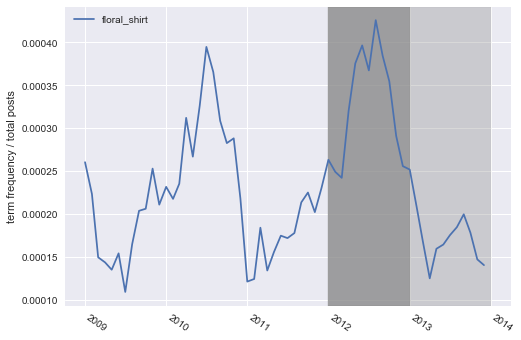

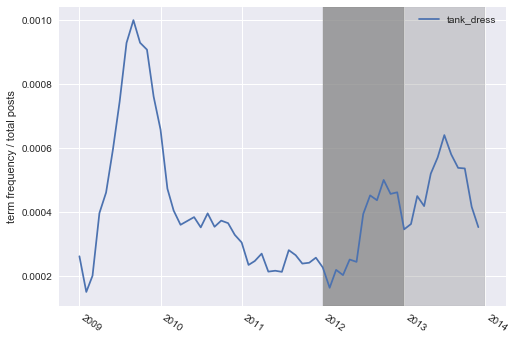

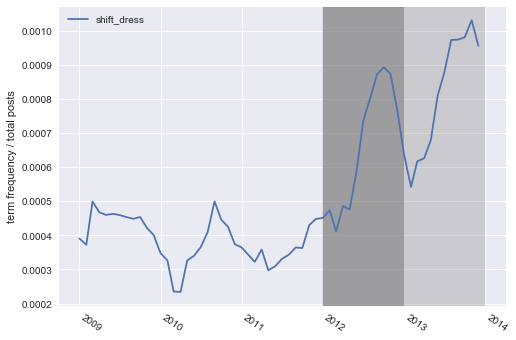

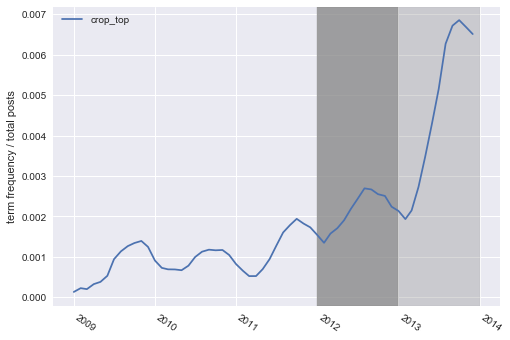

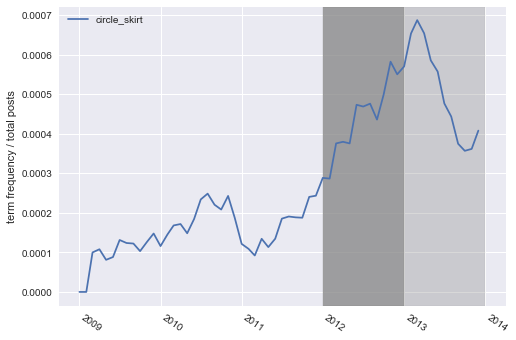

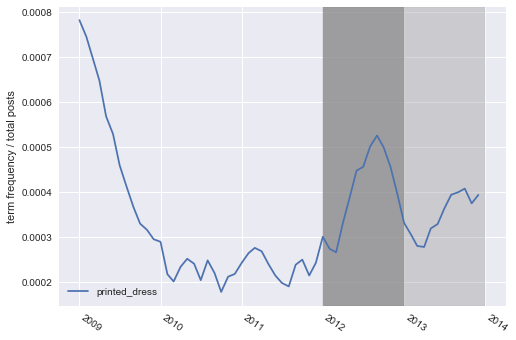

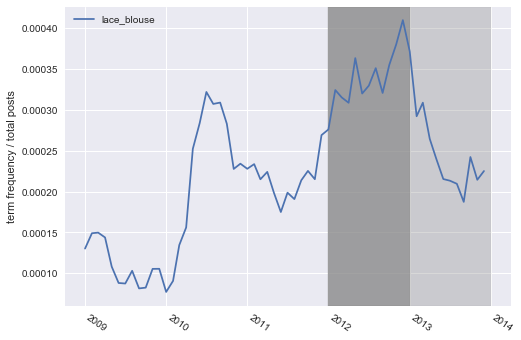

In [4]:
for trend in potential_trends_2013:
    trend_obj = Trend(trend)
    trend_obj.plot_by_month(trenddf.df, 1, 2009, 60)
    trend_obj.show_plot(2012)